<a href="https://colab.research.google.com/github/bogdanmadryga/Bogdan-Mgit/blob/main/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
import kagglehub
thedevastator_sms_spam_collection_a_more_diverse_dataset_path = kagglehub.dataset_download('thedevastator/sms-spam-collection-a-more-diverse-dataset')

print('Data source import complete.')


100%|██████████| 207k/207k [00:00<00:00, 71.6MB/s]

Extracting files...
Data source import complete.


In [ ]:
import kagglehub
import pandas as pd
import os # Import the os module for path manipulation
import re
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

import re
import spacy
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)


100%|██████████| 211k/211k [00:00<00:00, 67.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
print(os.listdir(path))

['spam.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "spam.csv"),
                 encoding="latin-1")

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

df = df.rename(columns={"v1": "label", "v2": "message"})

In [ ]:
# Розподіл кількостей
label_counts = df['label'].value_counts()
print("Кількість повідомлень у кожному класі:")
print(label_counts)

Кількість повідомлень у кожному класі:
label
ham     4825
spam     747
Name: count, dtype: int64


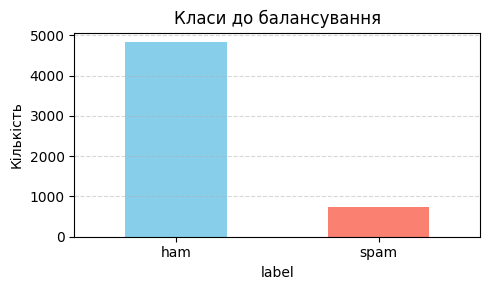

In [ ]:
# Побудова графіка ДО
plt.figure(figsize=(5, 3))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Класи до балансування")
plt.ylabel("Кількість")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 1. Очистка тексту за допомогою spaCy та NLTK
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Видалення небажаних символів
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Залишаємо лише літери та пробіли
    text = text.lower()  # Перетворення в нижній регістр
    # Токенізація та видалення стоп-слів
    doc = nlp(text)
    #Лемматизація перетворює слова до базової форми (наприклад, "running" → "run").
    #Видаляються слова зі списку стоп-слів і пунктуація.
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    #Об’єднання очищених токенів у текст
    return " ".join(tokens)

df['sms_cleaned'] = df['message'].apply(clean_text)

# Виведемо результат
df[['message', 'sms_cleaned']]

,message,sms_cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts s...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah not think go usf live around though
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,nd time try contact u u pound prize clai...
5568,Will Ì_ b going to esplanade fr home?,b go esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5570,The guy did some bitching but I acted like i'd...,guy bitching act like interested buy something...


In [ ]:
# 2. Перетворення тексту на числові ознаки (TF-IDF)
#Після очистки текст потрібно перетворити на формат, придатний для моделі машинного навчання.
#Для цього використовується метод TF-IDF
#Цей метод перетворює текст на числовий вектор, що відображає важливість кожного слова в тексті відносно всіх документів

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['sms_cleaned']).toarray()

#Текст очищеного стовпця sms_cleaned перетворюється на матрицю чисел.
#Кожен рядок матриці представляє одне повідомлення, а кожен стовпець — слово.
#Результат: X — це матриця розміру (кількість повідомлень × 500).
y = df['label']
y

,label
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [ ]:
# 3. Розділення даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

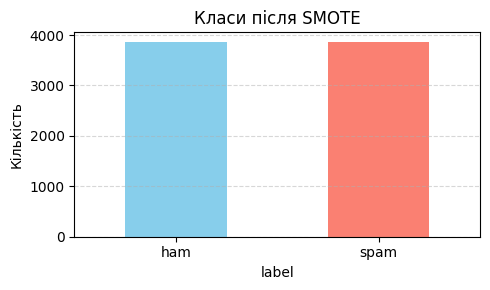

In [ ]:
# Графік після балансування
balanced = pd.Series(y_train_resampled).value_counts()
plt.figure(figsize=(5, 3))
balanced.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Класи після SMOTE")
plt.ylabel("Кількість")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Модель логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка моделі
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9713004484304932
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.98       965
        spam       0.87      0.92      0.90       150

    accuracy                           0.97      1115
   macro avg       0.93      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
X_sample = X_test[:200]
y_sample_true = y_test.iloc[:200]

# Прогноз моделі
y_sample_pred = model.predict(X_sample)

# Вивід результатів
print(f"{'Повідомлення':<60} | {'Істина':^8} | {'Прогноз':^8}")
print("-" * 85)

for i in range(200):
    msg_index = y_sample_true.index[i]  # реальний індекс у df
    msg_text = df.loc[msg_index, "sms_cleaned"]

    true_label = "spam" if y_sample_true.iloc[i] == 1 else "ham"
    pred_label = "spam" if y_sample_pred[i] == 1 else "ham"

    print(f"{msg_text[:55]:<60} | {true_label:^8} | {pred_label:^8}")

Повідомлення                                                 |  Істина  | Прогноз 
-------------------------------------------------------------------------------------
funny fact nobody teach volcano   erupt tsunamis   aris      |   ham    |   ham   
send score sophas secondary application school think th      |   ham    |   ham   
know someone know fancy call   find pobox   lshb p           |   ham    |   ham   
promise get soon text morning let know make ok               |   ham    |   ham   
congratulation ur award either   cd gift voucher   free      |   ham    |   ham   
ill text carlo let know hang                                 |   ham    |   ham   
ki didt see youkwhere                                        |   ham    |   ham   
messageno responcewhat happend                               |   ham    |   ham   
get gandhipuram walk cross cut road right side ltgt str      |   ham    |   ham   
flippin shit yet                                             |   ham    |   ham   
r